# CNN for max accuracy on CIFA10 with (Adam, SGD and RMSProp)

## Imports

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
CATEGORIES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## Sequential Model

In [6]:
model = keras.Sequential([
    keras.Input(shape=(32,32,3)), # Input Layer

    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax') # Output Layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

## Optimisers

In [7]:
opts = ['adam', 'sgd', 'rmsprop']

## Model Compiling and Training

In [17]:
def show_acc_loss_over_epochs(h, opt: str):
  plt.figure(figsize=(15,15))
  plt.suptitle(opt + ' Optimiser', fontsize=16)

  plt.subplot(3,2,1)
  plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
  plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend(loc='lower right')

  plt.subplot(3,2,2)
  plt.plot(h.history['loss'], 'o-', label='train loss')
  plt.plot(h.history['val_loss'], 'o-', label='validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend(loc='upper right')

In [20]:
def compile_train_show(opt: str, model):
  model.compile(
      optimizer = opt,
      loss = 'sparse_categorical_crossentropy',
      metrics=['accuracy']
  )
  print(f'Compiling model for {opt}')
  h = model.fit(x = X_train, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 32)
  show_acc_loss_over_epochs(h, opt)


Compiling model for adam
Epoch 1/10
1250/1250 [==============================] - 68s 53ms/step - loss: 0.2258 - accuracy: 0.9193 - val_loss: 1.8565 - val_accuracy: 0.6803
Epoch 2/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.2043 - accuracy: 0.9258 - val_loss: 2.0064 - val_accuracy: 0.6654
Epoch 3/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.1916 - accuracy: 0.9303 - val_loss: 2.0067 - val_accuracy: 0.6787
Epoch 4/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.2115 - accuracy: 0.9247 - val_loss: 1.9828 - val_accuracy: 0.6734
Epoch 5/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.1977 - accuracy: 0.9297 - val_loss: 2.0101 - val_accuracy: 0.6802
Epoch 6/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.1899 - accuracy: 0.9322 - val_loss: 1.9592 - val_accuracy: 0.6794
Epoch 7/10
1250/1250 [==============================] - 62s 49ms/step - loss: 0.2003 - accuracy: 0.

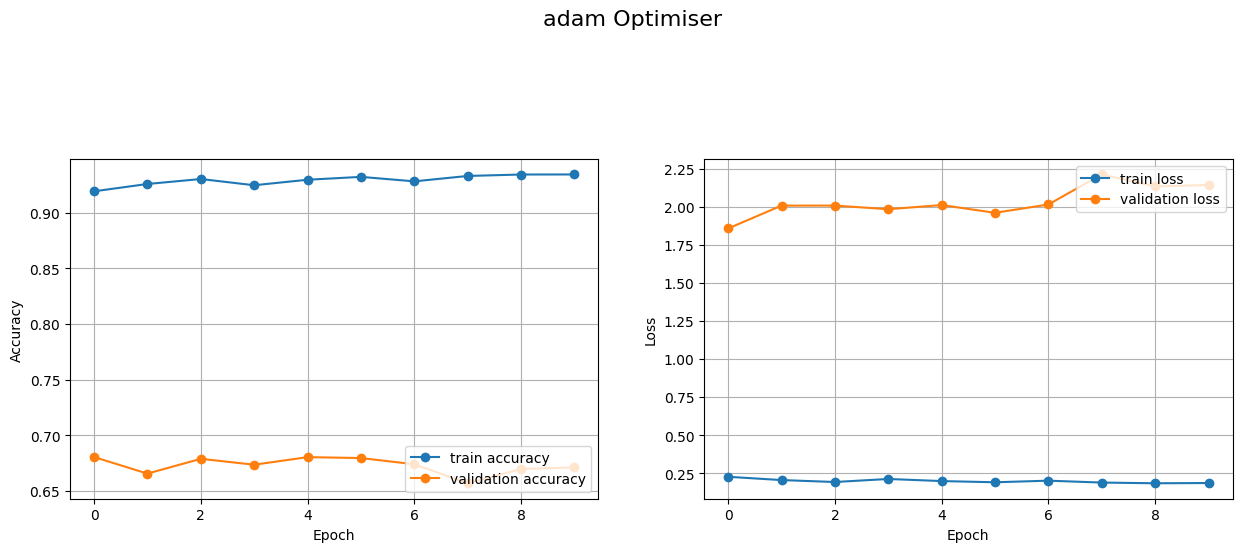

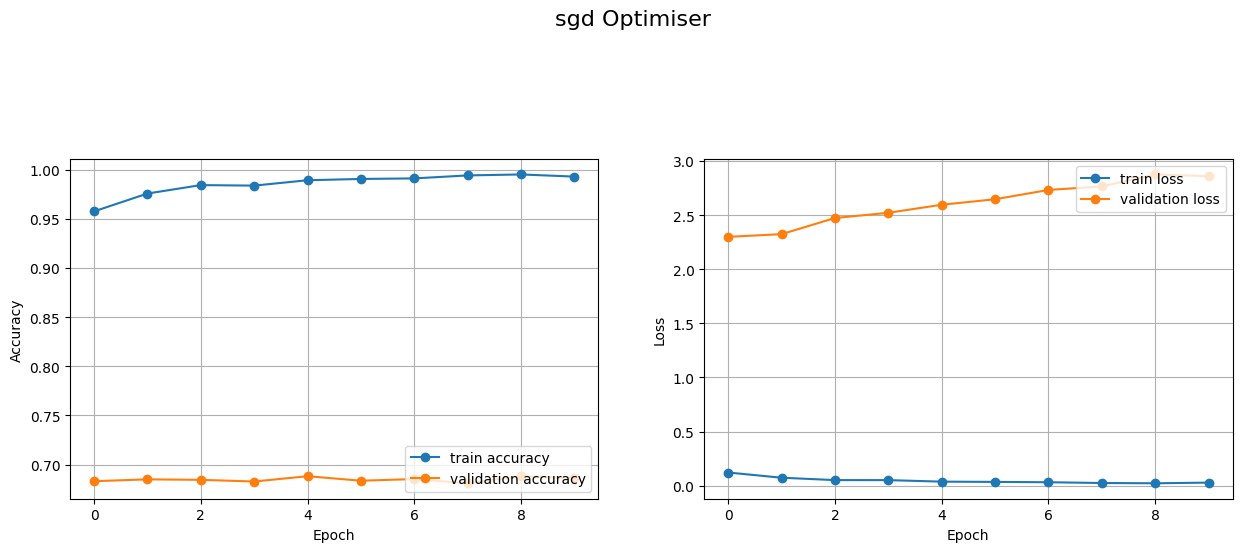

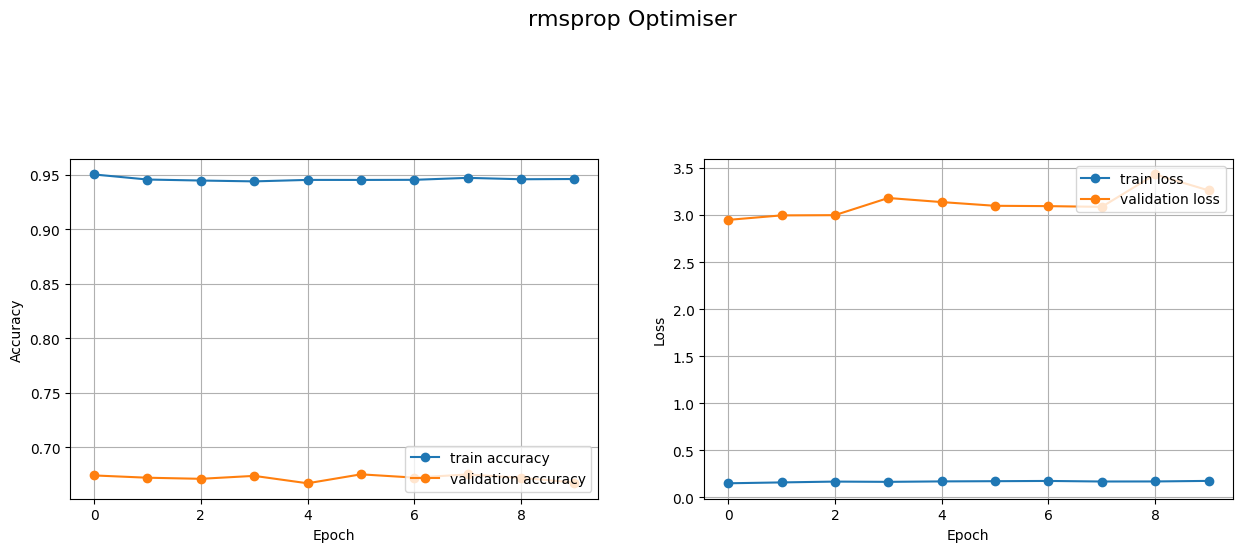

In [21]:
for o in opts:
  compile_train_show(o, model)

plt.show()